### MNIST digits classification with tensorflow keras

In [1]:
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten 
import matplotlib.pyplot as plt
import numpy as np

2024-07-15 12:44:59.069110: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 12:44:59.069228: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 12:44:59.191015: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


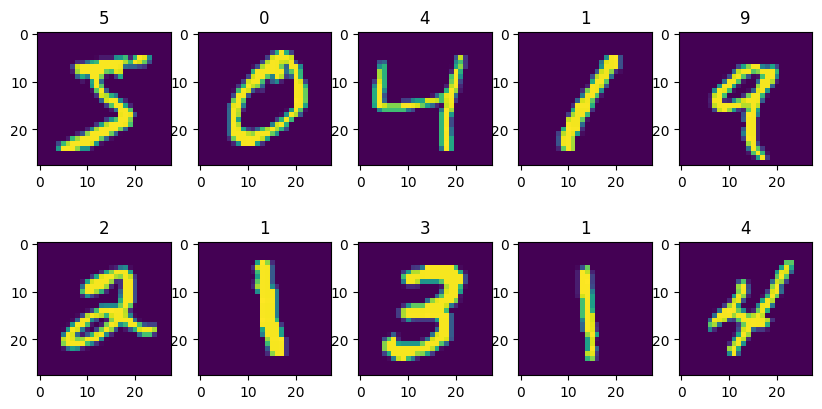

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))
idx = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[idx])
        ax[i,j].set_title(y_train[idx])
        idx += 1
plt.show()

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
x_train = x_train / 255.  
x_test = x_test / 255.   

In [8]:
x_train.dtype

dtype('float64')

In [9]:
model = Sequential([
    tf.keras.Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,440 (419.69 KB)

 Trainable params: 107,440 (419.69 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer="Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ["accuracy"])

In [12]:
model.fit(x_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


  94/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5788 - loss: 1.4750

I0000 00:00:1721047516.383168      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721047516.401439      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.4744

W0000 00:00:1721047519.437227      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8656 - loss: 0.4728 - val_accuracy: 0.9532 - val_loss: 0.1556
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9651 - loss: 0.1208 - val_accuracy: 0.9653 - val_loss: 0.1166
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0766 - val_accuracy: 0.9708 - val_loss: 0.0979
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0584 - val_accuracy: 0.9700 - val_loss: 0.1038
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0429 - val_accuracy: 0.9705 - val_loss: 0.1047
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9742 - val_loss: 0.0926
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0265 - val_accuracy: 0.9737 - val_loss: 0.0921
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accurac

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy : {acc}\nLoss : {loss}")

117/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.1171

W0000 00:00:1721047546.846178      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.1145
Accuracy : 0.9775000214576721
Loss : 0.09565429389476776


### MNIST classification with Pytorch

In [14]:
import os
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torchvision import datasets, transforms

In [15]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [16]:
input_size = 28*28
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

In [17]:
class NNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 50)
        self.linear3 = nn.Linear(50,  num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        
    def forward(self, X):
        X = self.flatten(X)
        X = self.linear1(X)
        X = self.relu(X)
        X = self.linear2(X)
        X = self.relu(X)
        X = self.linear3(X)
        return self.softmax(X)

In [18]:
model = NNet(input_size, num_classes).to(device)

In [19]:
print(model)

NNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
)


In [20]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2], device='cuda:0')


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [21]:
train_dataset = datasets.MNIST(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11421540.99it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 341502.43it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3197980.28it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2955403.16it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [22]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [23]:
def accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            
            pred = model(x)
            _, predictions = pred.max(1)
            num_correct += (predictions==y).sum()
            num_samples += predictions.size(0)
    model.train()
    return float(num_correct)/float(num_samples)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
for epoch in range(num_epochs):
    for batch_idx, (data, label) in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
        data = data.reshape(data.shape[0], -1)
        
        pred = model(data)
        loss = criterion(pred, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [26]:
train_acc = accuracy(train_loader, model)
test_acc = accuracy(test_loader, model)
print(f"Train accuracy : {train_acc}\nTest accuracy : {test_acc}")

Train accuracy : 0.9828833333333333
Test accuracy : 0.9734
